<h2 align="center">AtliQ Hotels Data Analysis Project<h2>

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

***
### 1. Data Import and Data Exploration
***

### Datasets
We have 5 csv file 

   - dim_date.csv  
   - dim_hotels.csv
   - dim_rooms.csv
   - fact_aggregated_bookings
   - fact_bookings.csv

In [65]:
df_bookings=pd.read_csv('fact_bookings.csv')
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [66]:
df_bookings.shape

(134590, 12)

In [67]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [68]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [69]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

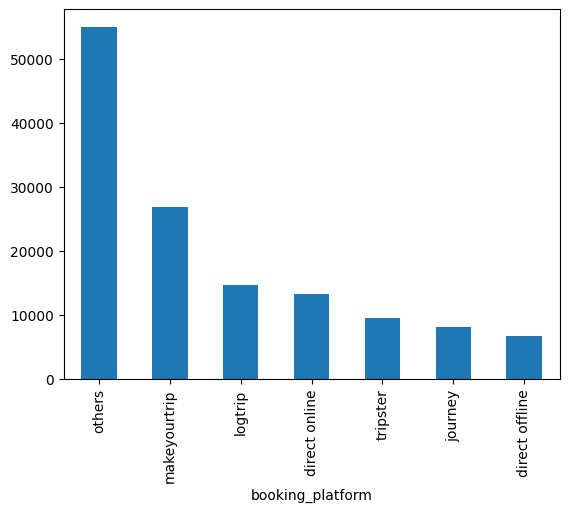

In [70]:
df_bookings.booking_platform.value_counts().plot(kind='bar')
plt.show()

In [71]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [72]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

In [73]:
df_date = pd.read_csv('dim_date.csv')
df_hotels = pd.read_csv('dim_hotels.csv')
df_rooms = pd.read_csv('dim_rooms.csv')
df_agg_bookings = pd.read_csv('fact_aggregated_bookings.csv')

In [74]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [75]:
df_hotels.shape

(25, 4)

In [76]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

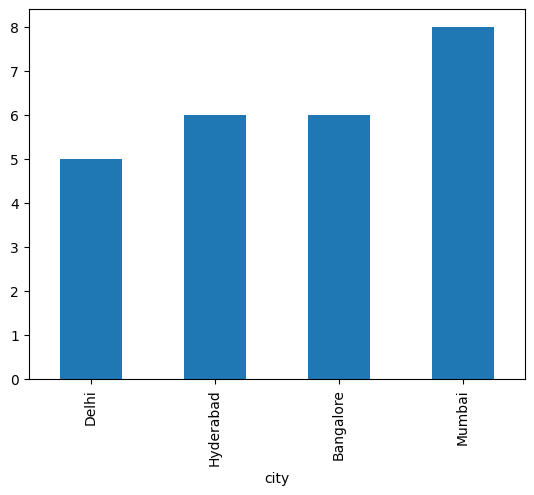

In [77]:
df_hotels.city.value_counts().sort_values().plot(kind='bar')
plt.show()

In [78]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [79]:
df_agg_bookings.shape

(9200, 5)

### unique property ids in aggregate bookings dataset

In [80]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [81]:
len(df_agg_bookings.property_id.unique())

25

### total bookings per property_id

In [82]:
df_agg_bookings.groupby('property_id')['successful_bookings'].sum().sort_values(ascending=False)

property_id
16559    7338
18562    7333
16563    7211
18560    6638
18561    6458
17563    6337
17559    6142
19560    6079
17560    6013
19562    5812
19561    5736
19563    5413
18559    5256
17561    5183
17558    5053
16562    4820
18563    4737
19559    4729
16560    4693
18558    4475
16561    4418
19558    4400
17564    3982
17562    3424
16558    3153
Name: successful_bookings, dtype: int64

### days on which bookings are greater than capacity

In [83]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [84]:
df_agg_bookings[df_agg_bookings['successful_bookings']>df_agg_bookings['capacity']]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


### properties that have highest capacity

In [85]:
df_agg_bookings[df_agg_bookings['capacity']==df_agg_bookings['capacity'].max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


In [86]:
df_agg_bookings[df_agg_bookings['capacity']==df_agg_bookings['capacity'].max()]['property_id'].unique()

array([17558], dtype=int64)

***
###  2. Data Cleaning
***

In [87]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


As you can see above, number of guests having less than zero value represents data error. We can ignore these records.

In [88]:
df_bookings[df_bookings['no_guests']<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [89]:
len(df_bookings[df_bookings['no_guests']<=0])

9

In [90]:
9/df_bookings.shape[0]

6.686975258191545e-05

its almost zero hence we can ignore these records for the analysis

In [91]:
df_bookings=df_bookings[df_bookings['no_guests']>0].reset_index(drop=True)

In [92]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134578.000000,134578.000000,56679.000000,1.345780e+05,134578.000000
mean,18061.143315,2.036744,3.619048,1.537804e+04,12696.011822
std,1093.053454,1.031710,1.234970,9.304015e+04,6927.841641
min,16558.000000,1.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [93]:
df_bookings.shape

(134578, 12)

In [94]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
1,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
2,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
3,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
4,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


Outlier removal in revenue generated

In [95]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

It is not possible to get 28 milllion in as single booking

In [96]:
avg,std=df_bookings.revenue_generated.mean(),df_bookings.revenue_generated.std()

In [97]:
avg,std

(15378.036937686695, 93040.1549314641)

In [98]:
higher_limit=avg+3*std
higher_limit

294498.50173207896

In [99]:
lower_limit=avg-3*std
lower_limit

-263742.4278567056

In [100]:
df_bookings[df_bookings.revenue_generated<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


no negative values

In [101]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
106,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
310,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
557,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129165,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [102]:
df_bookings=df_bookings[df_bookings.revenue_generated<higher_limit].reset_index(drop=True)

In [103]:
df_bookings.shape

(134573, 12)

In [104]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 45220)

In [105]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [106]:
higher_limit=df_bookings.revenue_realized.mean()+ 3*df_bookings.revenue_realized.std()
higher_limit

33479.358661845814

In [107]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
130,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
132,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
136,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
142,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
215,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134312,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134315,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134451,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134458,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [108]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


One observation from above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room types

In [109]:
df_bookings[df_bookings.room_category=='RT4'].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [110]:
# mean + 3*standard deviation
23439+3*9048

50583

Here higher limit comes to be 50583 and in our dataframe above we can see that max value for revenue realized is 45220. Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column

In [111]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

The total number of entries in the DataFrame is **134,573**, out of which **77,897** rows have a null `rating`. Since these null values are intentional (users chose not to provide a rating), we can handle them by imputing as follows:

1. **"No Rating" Imputation:** This helps the model understand that the absence of a rating is intentional and not negative feedback. It explicitly clarifies that these users did not provide a rating.

2. **Indicator Column for Missing Ratings:** Adding a flag (e.g., `rating_missing = 1` for null ratings and `0` otherwise) can help the model distinguish between rows where ratings are absent and those with actual ratings.

However, for analysis purposes, the missing ratings are currently left as null.

In [112]:
df_bookings.ratings_given.unique()

array([nan,  5.,  4.,  3.,  1.,  2.])

In [113]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [114]:
df_agg_bookings.shape

(9200, 5)

In [115]:
df_agg_bookings[df_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


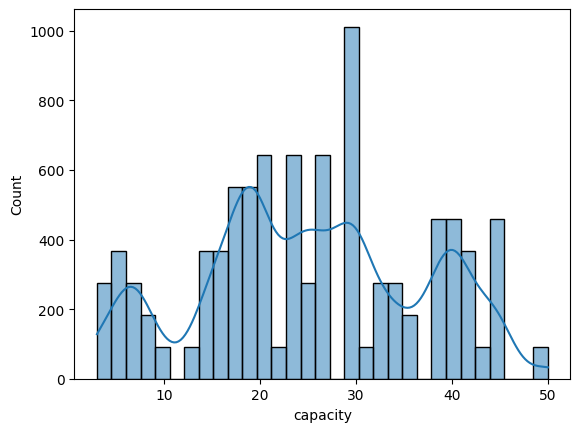

In [116]:
sns.histplot(df_agg_bookings.capacity,kde=True)
plt.show()

In [117]:
df_agg_bookings.capacity.median()

25.0

In [118]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(),inplace=True)

In [119]:
df_agg_bookings.isnull().sum().sum()

0

In [120]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [121]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


**We can see that successful_bookings > capacity which is not possible hence dropping respective rows**

In [122]:
df_agg_bookings.shape

(9200, 5)

In [123]:
6/9200

0.0006521739130434783

In [126]:
df_agg_bookings=df_agg_bookings[df_agg_bookings.successful_bookings<=df_agg_bookings.capacity]

In [127]:
df_agg_bookings.shape

(9194, 5)

***
### 3. Data Transformation
***

In [128]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0


**creating occupancy percentage column**

In [129]:
df_agg_bookings.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity'],
      dtype='object')

In [130]:
df_agg_bookings['occ_pct']=df_agg_bookings['successful_bookings']/df_agg_bookings['capacity']

In [131]:
df_agg_bookings['occ_pct']

0       0.833333
1       0.933333
2       0.766667
4       0.947368
5       0.700000
          ...   
9195    0.722222
9196    0.722222
9197    0.500000
9198    0.500000
9199    0.750000
Name: occ_pct, Length: 9194, dtype: float64

In [132]:
df_agg_bookings['occ_pct']=df_agg_bookings['occ_pct'].apply(lambda x: round(x*100,2))

In [133]:
df_agg_bookings['occ_pct']

0       83.33
1       93.33
2       76.67
4       94.74
5       70.00
        ...  
9195    72.22
9196    72.22
9197    50.00
9198    50.00
9199    75.00
Name: occ_pct, Length: 9194, dtype: float64

***
###  4. Insights Generation
***

### **Average occupancy rate in each of the room categories**

In [134]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


In [135]:
df_agg_bookings.groupby('room_category')['occ_pct'].mean().round(2)

room_category
RT1    57.89
RT2    58.01
RT3    58.03
RT4    59.28
Name: occ_pct, dtype: float64

In [136]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [137]:
df=pd.merge(df_agg_bookings,df_rooms,left_on='room_category' ,right_on='room_id')
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,RT1,Standard


In [208]:
df.groupby('room_class')['occ_pct'].mean().round(2).sort_values(ascending=False)

room_class
Presidential    58.05
Premium         56.98
Elite           56.87
Standard        56.71
Name: occ_pct, dtype: float64

**Presidential rooms have the highest occupancy percentage, followed by Premium and Elite rooms. Standard rooms have the lowest occupancy percentage among the four room classes.**

In [139]:
df.drop('room_id',axis=1,inplace=True)

In [140]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,Standard


### **Average occupancy rate per city**

In [141]:
df=pd.merge(df_hotels,df,on='property_id')

In [142]:
df.head()

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16558,Atliq Grands,Luxury,Delhi,1-May-22,RT1,18,19.0,94.74,Standard
1,16558,Atliq Grands,Luxury,Delhi,1-May-22,RT2,21,22.0,95.45,Elite
2,16558,Atliq Grands,Luxury,Delhi,1-May-22,RT3,8,8.0,100.00,Premium
3,16558,Atliq Grands,Luxury,Delhi,1-May-22,RT4,3,3.0,100.00,Presidential
4,16558,Atliq Grands,Luxury,Delhi,2-May-22,RT1,12,19.0,63.16,Standard


In [143]:
df.groupby('city')['occ_pct'].mean().sort_values(ascending=False).round(2)

city
Delhi        61.51
Hyderabad    58.12
Mumbai       57.91
Bangalore    56.33
Name: occ_pct, dtype: float64

**Delhi has the highest average occupancy percentage, followed by Hyderabad and Mumbai. Bangalore has the lowest average occupancy percentage among the four cities.**


### **Was the occupancy better? Weekday or Weekend?**

In [145]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [146]:
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df.head(3)

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,date,mmm yy,week no,day_type
0,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT1,10,19.0,52.63,Standard,10-May-22,May 22,W 20,weekeday
1,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT2,12,22.0,54.55,Elite,10-May-22,May 22,W 20,weekeday
2,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT3,4,8.0,50.00,Premium,10-May-22,May 22,W 20,weekeday


In [147]:
df.groupby('day_type')['occ_pct'].mean().round(2)

day_type
weekeday    50.88
weekend     72.34
Name: occ_pct, dtype: float64

**weekend is higher as expected**

### **Occupancy for different cities in the month of June**

In [148]:
df['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [149]:
df_june_22=df[df['mmm yy']=='Jun 22']
df_june_22.head()

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,date,mmm yy,week no,day_type
88,16558,Atliq Grands,Luxury,Delhi,10-Jun-22,RT1,11,19.0,57.89,Standard,10-Jun-22,Jun 22,W 24,weekeday
89,16558,Atliq Grands,Luxury,Delhi,10-Jun-22,RT2,16,22.0,72.73,Elite,10-Jun-22,Jun 22,W 24,weekeday
90,16558,Atliq Grands,Luxury,Delhi,10-Jun-22,RT3,6,8.0,75.00,Premium,10-Jun-22,Jun 22,W 24,weekeday
91,16558,Atliq Grands,Luxury,Delhi,10-Jun-22,RT4,3,3.0,100.00,Presidential,10-Jun-22,Jun 22,W 24,weekeday
92,16558,Atliq Grands,Luxury,Delhi,11-Jun-22,RT1,18,19.0,94.74,Standard,11-Jun-22,Jun 22,W 24,weekend


In [150]:
df_june_22.groupby("city")["occ_pct"].mean().round(2).sort_values(ascending=False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.44
Name: occ_pct, dtype: float64

In [151]:
df_august=pd.read_csv('new_data_august.csv')
df_august.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67


In [152]:
df.head(3)

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,date,mmm yy,week no,day_type
0,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT1,10,19.0,52.63,Standard,10-May-22,May 22,W 20,weekeday
1,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT2,12,22.0,54.55,Elite,10-May-22,May 22,W 20,weekeday
2,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT3,4,8.0,50.00,Premium,10-May-22,May 22,W 20,weekeday


#### date is redundant

In [153]:
df.drop('date',axis=1,inplace=True)

In [154]:
df.columns

Index(['property_id', 'property_name', 'category', 'city', 'check_in_date',
       'room_category', 'successful_bookings', 'capacity', 'occ_pct',
       'room_class', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [155]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [156]:
s1,s2=set(df.columns),set(df_august.columns)

In [157]:
s1.symmetric_difference(s2)

{'occ%', 'occ_pct'}

In [158]:
df_august.rename(columns={'occ%':'occ_pct'},inplace=True)

In [159]:
s1,s2=set(df.columns),set(df_august.columns)

In [160]:
s1.symmetric_difference(s2)

set()

In [161]:
latest_df=pd.concat([df,df_august],ignore_index=True,axis=0)
latest_df.head()

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,mmm yy,week no,day_type
0,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT1,10,19.0,52.63,Standard,May 22,W 20,weekeday
1,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT2,12,22.0,54.55,Elite,May 22,W 20,weekeday
2,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT3,4,8.0,50.00,Premium,May 22,W 20,weekeday
3,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT4,2,3.0,66.67,Presidential,May 22,W 20,weekeday
4,16558,Atliq Grands,Luxury,Delhi,11-May-22,RT1,12,19.0,63.16,Standard,May 22,W 20,weekeday


In [162]:
df.shape

(6497, 13)

In [163]:
df_august.shape

(7, 13)

In [164]:
latest_df.shape

(6504, 13)

### **Revenue realized per city**

In [165]:
df_bookings.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [166]:
df_hotels.head(2)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai


In [167]:
df_bookings_all=pd.merge(df_bookings,df_hotels,on='property_id')
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [168]:
df_bookings_all.groupby('city')['revenue_realized'].sum().sort_values(ascending=False)

city
Mumbai       668569251
Bangalore    420383550
Hyderabad    325179310
Delhi        294404488
Name: revenue_realized, dtype: int64

**While Delhi leads in occupancy rates (61.51%), it generates the lowest revenue (294M) among the four cities. Mumbai presents an interesting contrast - ranking 3rd in occupancy (57.91%) but generating the highest revenue (668M), suggesting significantly higher room rates or larger inventory compared to other cities.**

In [222]:
df_bookings_all.groupby('room_category')['revenue_realized'].sum().sort_values(ascending=False)

room_category
RT2    560216304
RT3    462079944
RT4    376693126
RT1    309547225
Name: revenue_realized, dtype: int64

In [232]:
pd.crosstab(df_bookings_all['city'], df_bookings_all['room_category'])

room_category,RT1,RT2,RT3,RT4
city,,,,
Bangalore,9444,11717,7914,2940
Delhi,7941,8855,4867,2560
Hyderabad,9835,11643,8075,5330
Mumbai,11221,17285,9705,5241


**RT2 has generated the highest revenue, and we observe that Mumbai has the highest RT2 tier Hotel reservations. This may explain why Mumbai ranks highest in revenue realization.**

In [235]:
df_bookings_all[df_bookings_all['property_id']==17558]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,months
461,May012217558RT11,17558,11/4/2022,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,11050,4420,Atliq Grands,Luxury,Mumbai,Jan 22
462,May012217558RT12,17558,24-04-22,2022-01-05,3/5/2022,2.0,RT1,others,NaN,Cancelled,11050,4420,Atliq Grands,Luxury,Mumbai,Jan 22
463,May012217558RT13,17558,28-04-22,2022-01-05,7/5/2022,1.0,RT1,others,NaN,No Show,11050,11050,Atliq Grands,Luxury,Mumbai,Jan 22
464,May012217558RT14,17558,7/4/2022,2022-01-05,2/5/2022,2.0,RT1,makeyourtrip,3.0,Checked Out,11050,11050,Atliq Grands,Luxury,Mumbai,Jan 22
465,May012217558RT15,17558,29-04-22,2022-01-05,3/5/2022,2.0,RT1,logtrip,NaN,Cancelled,11050,4420,Atliq Grands,Luxury,Mumbai,Jan 22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133370,Jul312217558RT316,17558,7/7/2022,2022-07-31,5/8/2022,1.0,RT3,direct offline,NaN,Cancelled,20400,8160,Atliq Grands,Luxury,Mumbai,Jul 22
133371,Jul312217558RT317,17558,27-07-22,2022-07-31,1/8/2022,2.0,RT3,direct offline,3.0,Checked Out,20400,20400,Atliq Grands,Luxury,Mumbai,Jul 22
133372,Jul312217558RT41,17558,26-07-22,2022-07-31,2/8/2022,3.0,RT4,others,3.0,Checked Out,35530,35530,Atliq Grands,Luxury,Mumbai,Jul 22
133373,Jul312217558RT42,17558,28-07-22,2022-07-31,1/8/2022,6.0,RT4,makeyourtrip,2.0,Checked Out,45220,45220,Atliq Grands,Luxury,Mumbai,Jul 22


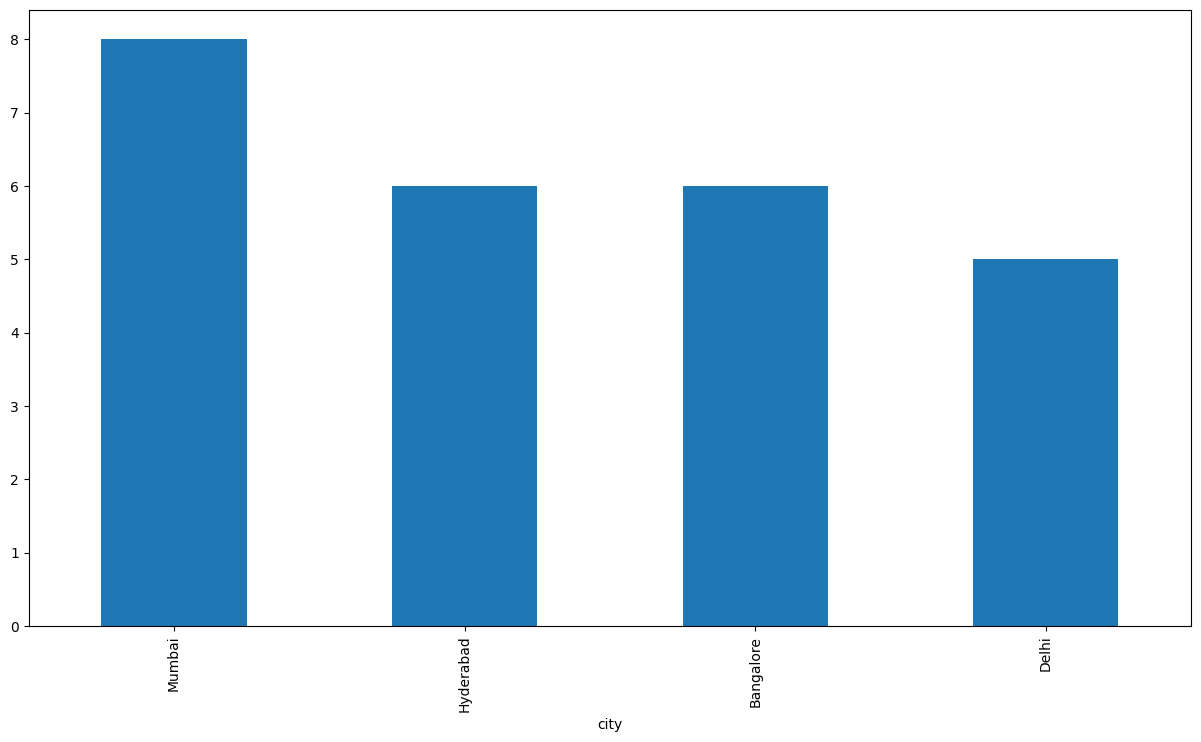

In [248]:
df_hotels['city'].value_counts().plot(kind='bar')
plt.show()

**Delhi leads in occupancy rates (61.51%) but generates the lowest revenue (294M), while Mumbai, despite ranking 3rd in occupancy (57.91%), earns the highest revenue (668M). This suggests Mumbai has significantly higher room rates or a larger hotel inventory. Notably, RT2 has the highest revenue, and Mumbai has the most RT2-tier hotel reservations. Additionally, Mumbai has the highest number of hotels, including the largest-capacity RT2-tier hotel, which likely contributes to its top revenue ranking.**

In simple terms, even if fewer rooms are filled (lower occupancy), the total revenue can still be higher if the city has more rooms overall or charges more per room.

In [244]:
df_bookings_all

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,months
0,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,Jan 22
1,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,Jan 22
2,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,Jan 22
3,May012216558RT17,16558,28-04-22,2022-01-05,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,Jan 22
4,May012216558RT18,16558,26-04-22,2022-01-05,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi,Jan 22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134568,Jul312217564RT45,17564,30-07-22,2022-07-31,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,Jul 22
134569,Jul312217564RT46,17564,29-07-22,2022-07-31,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,Jul 22
134570,Jul312217564RT48,17564,30-07-22,2022-07-31,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai,Jul 22
134571,Jul312217564RT49,17564,29-07-22,2022-07-31,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,Jul 22


In [245]:
df_bookings_all[['property_id', 'room_category']].drop_duplicates()

,property_id,room_category
0,16558,RT1
15,16558,RT2
35,16558,RT3
41,16558,RT4
44,16559,RT1
...,...,...
1933,19563,RT4
1937,17564,RT1
1946,17564,RT2
1971,17564,RT3


**The total of 100 rows indicates that each hotel property has all 4 room tiers (RT1, RT2, RT3, RT4). Since each property has 4 tiers, and there are 25 hotels, this results in 100 unique property-tier combinations (25 hotels × 4 tiers = 100 rows).**

### **month by month revenue**

In [209]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,months
0,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,Jan 22
1,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,Jan 22
2,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,Jan 22


In [170]:
df_bookings_all.shape

(134573, 15)

In [172]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [177]:
df_bookings_all['check_in_date']=pd.to_datetime(df_bookings_all['check_in_date'],format='mixed')

In [178]:
df_bookings_all['months']=df_bookings_all['check_in_date'].dt.strftime('%b %y')

In [179]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,months
0,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,Jan 22
1,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,Jan 22
2,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,Jan 22


In [180]:
df_bookings_all.groupby('months')['revenue_realized'].sum().sort_values(ascending=False)

months
May 22    408375641
Jul 22    389940912
Jun 22    377191229
Nov 22     61360194
Aug 22     61171387
Oct 22     61035620
Sep 22     60537295
Dec 22     60400345
Mar 22     57614072
Feb 22     57533129
Jan 22     57191154
Apr 22     56185621
Name: revenue_realized, dtype: int64

1. **Peak in May:** The highest revenue was generated in May 2022.
2. **Gradual Decline:** Revenue generally decreased from May to December 2022.
3. **January Dip:** A significant drop in revenue is observed in January 2022.

### **revenue realized per hotel type**

In [181]:
df_bookings_all['property_name'].unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [182]:
df_bookings_all.groupby('property_name')['revenue_realized'].sum().sort_values(ascending=False)

property_name
Atliq Exotica    320258588
Atliq Palace     304081863
Atliq City       285798439
Atliq Blu        260851922
Atliq Bay        259996918
Atliq Grands     211462134
Atliq Seasons     66086735
Name: revenue_realized, dtype: int64

**Atliq Exotica generated the highest revenue, followed by Atliq Palace and Atliq City. Atliq Seasons had the lowest revenue among the hotels.**

In [251]:
pd.crosstab(df_hotels['property_name'],df_hotels['city'])

city,Bangalore,Delhi,Hyderabad,Mumbai
property_name,,,,
Atliq Bay,1,1,1,1
Atliq Blu,1,1,1,1
Atliq City,1,1,1,1
Atliq Exotica,1,0,1,2
Atliq Grands,1,1,1,1
Atliq Palace,1,1,1,1
Atliq Seasons,0,0,0,1


### **average rating per city**

In [254]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,rating_missing,property_name,category,city,months
0,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,No Rating,Cancelled,9100,3640,0,Atliq Grands,Luxury,Delhi,Jan 22
1,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,0,Atliq Grands,Luxury,Delhi,Jan 22
2,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,0,Atliq Grands,Luxury,Delhi,Jan 22


In [185]:
df_bookings_all.groupby('city')['ratings_given'].mean().round(2).sort_values(ascending=False)

city
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Bangalore    3.41
Name: ratings_given, dtype: float64

**Delhi received the highest average rating, followed closely by Hyderabad and Mumbai. Bangalore received the lowest average rating among the cities.**

### **revenue realized per booking platform**

In [188]:
rev_platform=df_bookings_all.groupby('booking_platform')['revenue_realized'].sum()

In [190]:
plt.rcParams['figure.figsize']=[15,8]

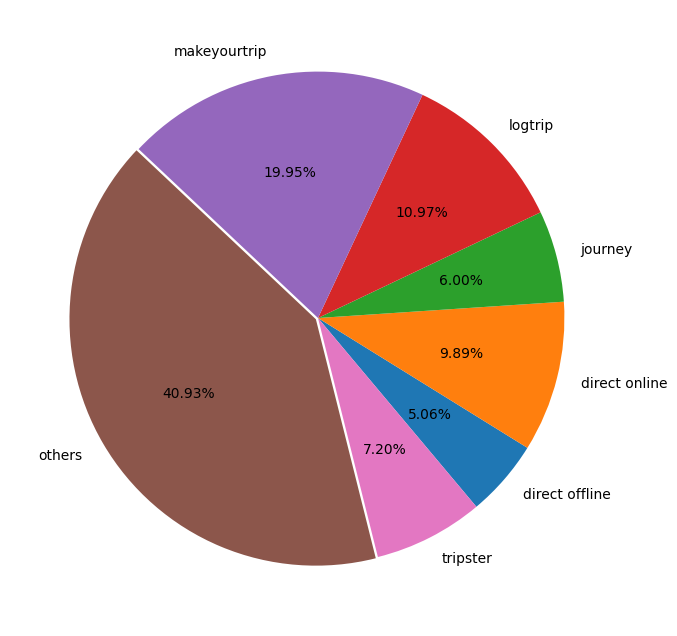

In [207]:
plt.pie(rev_platform,labels=rev_platform.index,autopct='%1.2f%%',startangle=310,explode=[0,0,0,0,0,0.01,0])
plt.show()